# ESTRATEGIA CONTRARIA

## Autor: María Carrasco Meléndez, Raquel Fort Serra y Lucía Saiz Lapique

__Práctica 4__

__Gestión de Activos y Carteras__

__CUNEF__

La segunda estrategia de optimización de carteras, o modelo de predicción de rendimientos a estudiar es la estrategia de cross sectional contraria a diferentes horizontes de inversión, es decir, la opuesta a la de momentum estudiada en el caso anterior. De todos los datos proporcionados, esta estrategia utiliza, también, únicamente los datos de rentabilidad de numerosos activos en diferentes plazos (largo plazo y corto plazo):
* Rentabilidad a 1 mes
* Rentabilidad a 3 meses
* Rentabilidad a 1 año
* Rentabilidad a 2 años
* Rentabilidad a 3 años 
* Rentabilidad a 5 años

Como explicamos en la preparación previa de los datos, los activos seleccionados son 59 activos pertenecientes a 4 índices distintos: Ibex 35, Euro Stoxx, Nasdaq y Dow Jones. Esta estrategia realiza un ranking de todos los activos en función a las posiciones de cada uno a corto o largo plazo (la importancia de cada plazo depende del peso que le demos a cada una y será explicada más adelante). El objetivo no es solo optimizar las rentabilidades de las acciones seleccionadas, sino hacer pruebas a la hora de seleccionar una estrategia u otra. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importamos los datos que hemos estudiado en el python anterior.

In [2]:
datos = pd.read_csv('activos_finales.csv')
datos = datos.set_index('Symbol')
datos.head()

,Name,Price,Currency,Sector,Country,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,...,PX_TO_BOOK_RATIO,PX_TO_CASH_FLOW,EPS_GROWTH,DVD_PAYOUT_RATIO,EQY_REC_CONS,TOT_ANALYST_REC,TOT_BUY_REC,TOT_SELL_REC,TWITTER_SENTIMENT_REALTIME,NEWS_SENTIMENT_RT
Symbol,,,,,,,,,,,,,,,,,,,,,
FRE,FRESENIUS SE & CO KGAA,43.880,EUR,Healthcare-Services,GERMANY,0.165162,-0.063294,-0.076405,-0.341636,-0.116814,...,1.4237820242958328,5.038176807835165,-7.397260273972603,24.864534379182157,4.538462,26,20,0,0.0,0.663
PHIA,KONINKLIJKE PHILIPS NV,42.040,EUR,Healthcare-Products,NETHERLANDS,0.057610,0.030771,0.163898,0.002897,0.114594,...,2.973449150377937,18.847019540996918,-7.205460569050113,63.85562575885329,4.115385,26,16,1,0.0,0
ORA,ORANGE,10.395,EUR,Telecommunications,FRANCE,-0.070630,-0.197607,-0.254839,0.025109,0.047468,...,1.0626812500467617,2.71270613202884,63.492063492063494,67.75820093864134,4.258065,31,21,1,0.0,0.234
OR,L'OREAL,251.100,EUR,Cosmetics/Personal Care,FRANCE,0.032059,-0.006332,0.032484,0.108156,0.085859,...,4.763649494786657,22.586171168445816,-4.26784482758621,63.253283233333335,3.032258,31,7,7,0.0,0
ASML,ASML HOLDING NV,295.600,EUR,Semiconductors,NETHERLANDS,0.108361,0.109818,0.734742,-0.046739,0.374452,...,10.045748564335948,39.42971046957317,0.9836065573770574,38.866863187131116,3.925000,40,23,4,0.0,-0.10678147706595072


En el caso de los datos históricos, eliminamos los activos que no coinciden con los datos anteriores.

In [3]:
historicos = pd.read_csv('datos_historicos.csv')
historicos = historicos.set_index('Date')
historicos.pop('SAN.1')
historicos.pop('SAN.2')
historicos.pop('SAN.3')
historicos.head()

,FRE,PHIA,ORA,OR,ASML,IBE,SU,BN,DTE,SAN,...,HD,GS,INTC,MRK,JPM,BA,WBA,VZ,AXP,CSCO
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,42.535000,24.174999,14.060,137.399994,89.129997,5.596,59.950001,53.860001,13.185,75.440002,...,103.430000,194.410004,36.360001,57.189999,62.490002,129.949997,76.000000,46.959999,93.019997,27.610001
2015-01-05,42.410000,23.375000,13.520,134.149994,87.489998,5.495,57.340000,52.480000,12.780,73.269997,...,101.260002,188.339996,35.950001,58.040001,60.549999,129.050003,74.500000,46.570000,90.559998,27.059999
2015-01-06,42.840000,23.155001,13.370,134.149994,84.669998,5.473,57.419998,52.320000,12.630,73.510002,...,100.949997,184.529999,35.279999,60.320000,58.980000,127.529999,74.690002,47.040001,88.629997,27.049999
2015-01-07,42.544998,23.275000,13.590,134.899994,84.949997,5.466,57.779999,52.930000,12.990,74.290001,...,104.410004,187.279999,36.020000,61.610001,59.070000,129.509995,76.599998,46.189999,90.300003,27.299999
2015-01-08,43.810001,23.865000,14.205,139.800003,88.190002,5.574,60.160000,54.459999,13.630,77.419998,...,106.720001,190.270004,36.689999,62.849998,60.389999,131.800003,77.550003,47.180000,91.580002,27.510000


Seleccionamos únicamente rentabilidades de todos los datos proporcionados para crear el ranking y los pesos ya que, en esta estrategia, son los únicos que se deben aplicar. Para ello, creamos un nuevo dataframe que será utilizado de ahora en adelante como los datos originales.

In [4]:
cuenta = datos.Name.count()
rentabilidades = datos[['Rentab 1M', 'Rentab 3M', 'Rentab 1Y', 'Rentab 2Y', 'Rentab 3Y', 'Rentab 5Y']]
rentabilidades.index = datos.index
rentabilidades.head()

,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,Rentab 5Y
Symbol,,,,,,
FRE,0.165162,-0.063294,-0.076405,-0.341636,-0.116814,0.540179
PHIA,0.057610,0.030771,0.163898,0.002897,0.114594,0.007071
ORA,-0.070630,-0.197607,-0.254839,0.025109,0.047468,0.141002
OR,0.032059,-0.006332,0.032484,0.108156,0.085859,0.132917
ASML,0.108361,0.109818,0.734742,-0.046739,0.374452,-0.071139


In [5]:
ranking = rentabilidades.rank(ascending=False) 
ranking.head()

,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,Rentab 5Y
Symbol,,,,,,
FRE,2.0,22.0,28.0,55.0,58.0,1.0
PHIA,20.0,9.0,12.0,31.0,34.0,41.0
ORA,58.0,44.0,48.0,30.0,44.0,21.0
OR,31.0,15.0,24.0,14.0,38.0,24.0
ASML,7.0,1.0,2.0,38.0,13.0,51.0


## Estrategia: mayor peso en largo

Seleccionamos unos pesos para el largo y corto plazo y se lo aplicamos a cada variable en función del ranking anterior. En este caso, se selecciona aplicarle __más peso al largo plazo__ pues aporta más rentabilidad (se ha seleccionado por prueba y error, estudiando los resultados finales de la estrategia) y es más estable que al contrario. Ponemos además un 1 de peso en largo y un 1 de peso en corto para optimizar los resultados (en esta estrategia es preferible que estos pesos no sean tan extremos como en la anterior, es decir, apalancar la estrategia).

Una vez seleccionada nuestra estrategia, decidimos aplicarle una importancia de 35 y 65 a cada plazo (corto y largo respectivamente), diversificando más la cartera en largo que en la estrategia  anterior, ya que, aunque se ha decidido que uno debe pesar más que el otro, queremos que ambas opciones estén diversificadas, pero en esta estrategia es preferible considerar los efectos a largo plazo y no tener tanta volatilidad.

In [6]:
corto = 35.0
largo = 65.0
peso_corto = -1
peso_largo = 1

A continuación, generamos un dataframe con los pesos finales de cada activo, teniendo en cuenta si tienen un mejor ranking en corto o en el largo plazo.

In [7]:
lista = []
for i in ranking['Rentab 1M']:
    m = []
    if i <= corto: 
        pesos = peso_corto/corto
        m.append(pesos)
    elif i >= (cuenta - largo): 
        pesos = peso_largo/largo
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista.extend(m)
    weights = pd.DataFrame(lista, columns = ['Rentab 1M'])

In [8]:
lista2 = []
for i in ranking['Rentab 3M']:
    m = []
    if i <= corto: 
        pesos = peso_corto/corto
        m.append(pesos)
    elif i >= (cuenta - largo): 
        pesos = peso_largo/largo
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista2.extend(m)
    weights2 = pd.DataFrame(lista2, columns = ['Rentab 3M'])

In [9]:
lista3 = []
for i in ranking['Rentab 1Y']:
    m = []
    if i <= corto: 
        pesos = peso_corto/corto
        m.append(pesos)
    elif i >= (cuenta - largo): 
        pesos = peso_largo/largo
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista3.extend(m)
    weights3 = pd.DataFrame(lista3, columns = ['Rentab 1Y'])

In [10]:
lista4 = []
for i in ranking['Rentab 2Y']:
    m = []
    if i <= corto: 
        pesos = peso_corto/corto
        m.append(pesos)
    elif i >= (cuenta - largo): 
        pesos = peso_largo/largo
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista4.extend(m)
    weights4 = pd.DataFrame(lista4, columns = ['Rentab 2Y'])

In [11]:
lista5 = []
for i in ranking['Rentab 3Y']:
    m = []
    if i <= corto: 
        pesos = peso_corto/corto
        m.append(pesos)
    elif i >= (cuenta - largo): 
        pesos = peso_largo/largo
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista5.extend(m)
    weights5 = pd.DataFrame(lista5, columns = ['Rentab 3Y'])

In [12]:
lista6 = []
for i in ranking['Rentab 5Y']:
    m = []
    if i <= corto: 
        pesos = peso_corto/corto
        m.append(pesos)
    elif i >= (cuenta - largo): 
        pesos = peso_largo/largo
        m.append(pesos)
    else:
        pesos = 0
        m.append(pesos)
    lista6.extend(m)
    weights6 = pd.DataFrame(lista6, columns = ['Rentab 5Y'])

Juntando los pesos de cada variable, obtenemos los pesos finales y añadimos una columna con el peso total de cada activo en base a su horizonte temporal. En el horizonte temporal hemos elegido pone pesos muy bajos a las rentabilidades en corto (1 mes y 3 meses) y mucha a las rentabilidades en largo.

In [14]:
weights['Rentab 3M'] = weights2['Rentab 3M']
weights['Rentab 1Y'] = weights3['Rentab 1Y']
weights['Rentab 2Y'] = weights4['Rentab 2Y']
weights['Rentab 3Y'] = weights5['Rentab 3Y']
weights['Rentab 5Y'] = weights6['Rentab 5Y']
weights['Symbol'] = datos.index
weights = weights.set_index('Symbol')
weights.head()

,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,Rentab 5Y
Symbol,,,,,,
FRE,-0.028571,-0.028571,-0.028571,0.015385,0.015385,-0.028571
PHIA,-0.028571,-0.028571,-0.028571,-0.028571,-0.028571,0.015385
ORA,0.015385,0.015385,0.015385,-0.028571,0.015385,-0.028571
OR,-0.028571,-0.028571,-0.028571,-0.028571,0.015385,-0.028571
ASML,-0.028571,-0.028571,-0.028571,0.015385,-0.028571,0.015385


Horizonte temporal para modeHorizonte temporal para modelos basado en rentabilidades pasadas. De forma opuesta al estudio anterior, seleccionamos estos pesos como horizonte temporal otorgándole mayor importancia a las rentabilidades en largo que a las de en corto. Con estos pesos y los obtenidos en base al ranking, generamos un peso total para cada activo.los stat arb basado en rentabilidades pasadas

In [15]:
imp = [0.025, 0.025, 0.15, 0.2, 0.25, 0.35]
sum(imp)

1.0

In [16]:
weights['Total'] = (imp*weights).sum(axis=1)
weights.head()

,Rentab 1M,Rentab 3M,Rentab 1Y,Rentab 2Y,Rentab 3Y,Rentab 5Y,Total
Symbol,,,,,,,
FRE,-0.028571,-0.028571,-0.028571,0.015385,0.015385,-0.028571,-0.008791
PHIA,-0.028571,-0.028571,-0.028571,-0.028571,-0.028571,0.015385,-0.013187
ORA,0.015385,0.015385,0.015385,-0.028571,0.015385,-0.028571,-0.008791
OR,-0.028571,-0.028571,-0.028571,-0.028571,0.015385,-0.028571,-0.017582
ASML,-0.028571,-0.028571,-0.028571,0.015385,-0.028571,0.015385,-0.004396


Calculamos a continuación los resultados preliminares, teniendo en cuenta las rentabilidades originales de cada activo y el peso otorgado en cada plazo. Observamos que, a diferencia de la estrategia de momentum (opuesta a esta estrategia), todos los resultados preliminares para esta estrategia son negativos. Esto se debe a que, al se opuesta a la estrategia de momentum, la estrategia de cross sectional contraria le otorga mejor ranking a las acciones que peor rendimiento tengan.

In [17]:
resultados_peliminares = (weights * rentabilidades).sum()
pd.DataFrame(resultados_peliminares, columns = ['Resultados Preliminares']).T

,Rentab 1M,Rentab 1Y,Rentab 2Y,Rentab 3M,Rentab 3Y,Rentab 5Y,Total
Resultados Preliminares,-0.083815,-0.230735,-0.162544,-0.0715,-0.325437,-0.227134,0.0


## Datos finales de la estrategia

Para la parte final de este estudio, debemos tener en cuenta los datos históricos de cada activo importados al principio del análisis. Estimamos el cambio de porcentaje de cada activo para obtener las renntabilidades diarias de cada una y así obtener los datos finales con los que generaremos la cartera óptima.

In [18]:
df = historicos.pct_change().dropna()
df.head()

,FRE,PHIA,ORA,OR,ASML,IBE,SU,BN,DTE,SAN,...,HD,GS,INTC,MRK,JPM,BA,WBA,VZ,AXP,CSCO
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.002939,-0.033092,-0.038407,-0.023654,-0.018400,-0.018049,-0.043536,-0.025622,-0.030717,-0.028765,...,-0.020980,-0.031223,-0.011276,0.014863,-0.031045,-0.006926,-0.019737,-0.008305,-0.026446,-0.019920
2015-01-06,0.010139,-0.009412,-0.011095,0.000000,-0.032232,-0.004004,0.001395,-0.003049,-0.011737,0.003276,...,-0.003061,-0.020229,-0.018637,0.039283,-0.025929,-0.011778,0.002550,0.010092,-0.021312,-0.000370
2015-01-07,-0.006886,0.005182,0.016455,0.005591,0.003307,-0.001279,0.006270,0.011659,0.028504,0.010611,...,0.034274,0.014903,0.020975,0.021386,0.001526,0.015526,0.025572,-0.018070,0.018842,0.009242
2015-01-08,0.029733,0.025349,0.045254,0.036323,0.038140,0.019758,0.041191,0.028906,0.049269,0.042132,...,0.022124,0.015965,0.018601,0.020127,0.022346,0.017682,0.012402,0.021433,0.014175,0.007692
2015-01-09,-0.005821,-0.028284,-0.016543,-0.014306,-0.026647,-0.011661,-0.022606,-0.022769,-0.026412,-0.032808,...,-0.017148,-0.015347,0.001908,-0.004614,-0.017387,-0.001973,-0.024242,-0.008902,-0.012667,0.010178


In [19]:
def ratios(rentabilidades, weights):
    '''
        returns = dataframe que contiene las rentabilidades diarias de los activos
        weights = pesos de los activos para cada uno de los periodos de tiempo y en total
        -----------------------------------------------------------------------------------
        final = resultado de la estrategia
    '''
    
    # genero los resultados como un indice de base 100
    resultados = [100]
    
    # cojo los pesos totales de la matriz de pesos
    pesos = weights.iloc[:,-1]
    
    # voy calculado los resultados como el anterior mas 1 por la rentabilidad que se obtienen diariamente de las
    # distintas acciones y sus pesos
    for i in range(1, len(rentabilidades)):
        
        value = resultados[i-1] * (1 + (rentabilidades.iloc[i] * pesos).sum())
        
        resultados.append(value)
    
    # meto en un dataframe para devovler el resultado final y asigno las fechas coo indice
    final = pd.DataFrame(resultados, columns=['Contraria'])  
    final.set_index(rentabilidades.index, inplace=True)
        
    return final

En el dataframe a continuación, podemos observar el resultado de esta estrategia y la graficamos a continuación. Como podemos observar, el resultado ha disminuido considerablemente en 5 años.

In [20]:
final = ratios(df, weights)
final

,Contraria
Date,
2015-01-05,100.000000
2015-01-06,100.283177
2015-01-07,99.557614
2015-01-08,98.072111
2015-01-09,98.798819
...,...
2019-12-25,57.811695
2019-12-26,57.743143
2019-12-27,57.630671


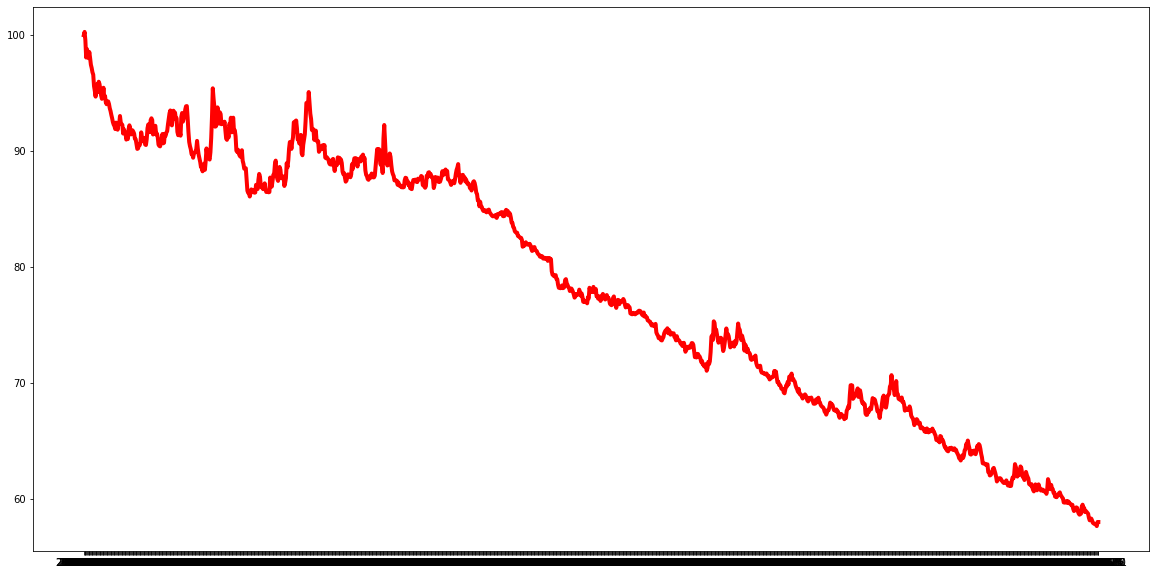

In [21]:
plt.figure(figsize=(20,10))
plt.plot(final.index, final['Contraria'], marker = '', markerfacecolor = 'red', markersize = 12, color = 'red', 
         linewidth = 4, label ='Contraria')

Podemos concluir que la selección de pesos para los datos en cuestión es correcta (al aplicar el inverso, es decir, mayor peso al corto que al largo, a pesar de que los resultados eran similares, la caida era mucho más pronunciada y menos estable).

In [22]:
final.to_csv('Estrategia_Contraria_final.csv')